# Machine Learning Homework 3

Michael Li

Nov 12, 2017

Abstract:

- Apply classification algorithms on MNIST dataset and compare results.
- Tune classification models to find the best predicting accuracy.

## Environment setup

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import sklearn
import timeit
import datetime
# Suppress warnings
import warnings
warnings.simplefilter('ignore')

## Load and cleanse dataset 

In [2]:
# load dataset
mnisttt = input_data.read_data_sets(".", one_hot=False)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [3]:
# define function to plot images
def image_plot(image, size):
    idxs = np.random.randint(len(image), size=size)
    plt.clf()
    f, axarr = plt.subplots(1, size, figsize = (20,20))
    for i in range(0,len(idxs)):
        X = mnisttt.train.images[idxs[i]]
        X = X.reshape([28, 28])
        axarr[i].imshow(X)
        axarr[i].set_axis_off()
    plt.show()

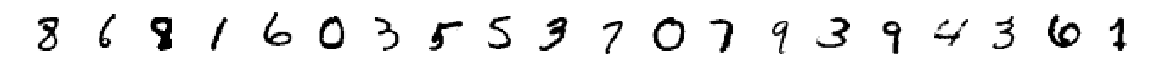

In [4]:
# plot 20 random images
image_plot(mnisttt.train.images, 20)

In [5]:
# print dataset size
print('The size of training image dataset is: ', mnisttt.train.images.shape)
print('The size of training label dataset is: ', mnisttt.train.labels.shape)
print('The size of validation image dataset is: ', mnisttt.validation.images.shape)
print('The size of validation label dataset is: ', mnisttt.validation.labels.shape)
print('The size of testing image dataset is: ', mnisttt.test.images.shape)
print('The size of testing label dataset is: ', mnisttt.test.labels.shape)

The size of training image dataset is:  (55000, 784)
The size of training label dataset is:  (55000,)
The size of validation image dataset is:  (5000, 784)
The size of validation label dataset is:  (5000,)
The size of testing image dataset is:  (10000, 784)
The size of testing label dataset is:  (10000,)


Since the requirement is to run classification algorithms on training data (60,000) and testing data (10,000) respectively, the training and validation datasets should be concatenated as one.

In [6]:
# concatenate training and validation data
train_image = np.append(mnisttt.train.images,mnisttt.validation.images, axis = 0) 
train_label = np.append(mnisttt.train.labels,mnisttt.validation.labels, axis = 0) 

# copy test labels to a new numpy array
test_label = mnisttt.test.labels

In [7]:
# print the size of training image and label dataset
print('The size of training image dataset is: ', train_image.shape)
print('The size of training label dataset is: ', train_label.shape)

The size of training image dataset is:  (60000, 784)
The size of training label dataset is:  (60000,)


In [8]:
# Normalize training and testing data
from sklearn.preprocessing import scale
train_image = scale(train_image)
test_image = scale(mnisttt.test.images)

## Basic classification models 

### Classifier 1: Perceptron

In [9]:
# Randomly sample a smaller dataset
from sklearn.utils import resample
train_image_sample = resample(train_image, n_samples = 10000, random_state = 0)
train_label_sample = resample(train_label, n_samples = 10000, random_state = 0)

In [10]:
# fit perceptron with training dataset
start = timeit.default_timer()

from sklearn.linear_model import Perceptron
clf_p = Perceptron()
clf_p.fit(train_image_sample, train_label_sample)

stop = timeit.default_timer()
clf_p_time = stop - start
print('Running time: %.3fs' % (stop - start))

Running time: 0.713s


In [11]:
# get the accuracy of training dataset
clf_p_train_score = clf_p.score(train_image, train_label)
print(clf_p_train_score)

0.84695


In [12]:
# get the accuracy of test dataset
clf_p_test_score = clf_p.score(test_image, test_label)
print(clf_p_test_score)

0.8487


### Classifier 2: Logistic Regression

In [13]:
# fit logistic regression with training sample dataset
start = timeit.default_timer()

from sklearn.linear_model import LogisticRegression
clf_logit = LogisticRegression(penalty = 'l2', C = 1, solver ='newton-cg')
clf_logit.fit(train_image_sample, train_label_sample)

stop = timeit.default_timer()
clf_logit_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 48.385


In [14]:
# get the accuracy of training sample
clf_logit_train_score = clf_logit.score(train_image, train_label)
print(clf_logit_train_score)

0.89585


In [15]:
# get the accuracy of testing dataset
clf_logit_test_score = clf_logit.score(test_image, test_label)
print(clf_logit_test_score)

0.8895


### Classifier 3: Linear SVM 

In [16]:
# fit linear svm with training sample dataset
start = timeit.default_timer()

from sklearn.svm import LinearSVC
clf_lsvm = LinearSVC(penalty = 'l2', C = 1.0, multi_class = 'ovr')
clf_lsvm.fit(train_image_sample, train_label_sample)

stop = timeit.default_timer()
clf_lsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 33.066


In [17]:
# get the accuracy of training dataset
clf_lsvm_train_score = clf_lsvm.score(train_image, train_label)
print(clf_lsvm_train_score)

0.871166666667


In [18]:
# get the accuracy of testing dataset
clf_lsvm_test_score = clf_lsvm.score(test_image, test_label)
print(clf_lsvm_test_score)

0.8591


### Classifier 4: Radial SVM

In [19]:
# fit radial SVM with training sample dataset
start = timeit.default_timer()

from sklearn.svm import SVC
clf_rsvm = SVC(C = 1.0, kernel = 'rbf', degree = 3, gamma = 'auto')
clf_rsvm.fit(train_image_sample, train_label_sample)

stop = timeit.default_timer()
clf_rsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 36.720


In [20]:
# get the accuracy of training dataset
clf_rsvm_train_score = clf_rsvm.score(train_image, train_label)
print(clf_rsvm_train_score)

0.945666666667


In [21]:
# get the accuracy of testing dataset
clf_rsvm_test_score = clf_rsvm.score(test_image, test_label)
print(clf_rsvm_test_score)

0.9398


### Basic classifier comparison

In [22]:
# create a dataframe to display comparison
d = {'Classifier': ['Perceptron', 'Logistic Regression', 'Linear SVM', 'Radial SVM'],
    'Training Accuracy': [clf_p_train_score, clf_logit_train_score, clf_lsvm_train_score, clf_rsvm_train_score],
    'Testing Accuracy': [clf_p_test_score, clf_logit_test_score, clf_lsvm_test_score, clf_rsvm_test_score],
    'Processing Time': [clf_p_time, clf_logit_time, clf_lsvm_time, clf_rsvm_time]}
df_clf_basic = pd.DataFrame(data = d)
df_clf_basic

,Classifier,Processing Time,Testing Accuracy,Training Accuracy
0,Perceptron,0.712973,0.8487,0.846950
1,Logistic Regression,48.385472,0.8895,0.895850
2,Linear SVM,33.065627,0.8591,0.871167
3,Radial SVM,36.719988,0.9398,0.945667


Based on the accuracy score, the radial SVM model has the best predicting ability for both training and testing data. 

## Tuned classification models

### Tuned Perceptron

To try different parameters and compare the accuracy, there are two methods:

1. **GridsearchCV method in Scikit-learn.**
    - This method takes in different parameters, which satisfies the requirement. But it also uses cross validation, which is not required and must use great computing power. Considering the limitation of computing power of this local machine, this method will not be used. 
    
2. **Customized function to try different parameters.**
    - This method also takes in different parameters and fit the models in turn. It does not compute using cross validation, and hence would not require great computing power. Thus this method is prefered.

In [23]:
# try different parameters and tune Perceptron

start = timeit.default_timer()

param_p = [1, 5, 10, 15, 20, 25, 50, 75, 100, 150]
train_scores_p = []
test_scores_p = []
for i in param_p:
    clf_temp = Perceptron(n_iter = i)
    clf_temp.fit(train_image_sample, train_label_sample)
    temp_train_score = clf_temp.score(train_image, train_label)
    temp_test_score = clf_temp.score(test_image, test_label)
    train_scores_p.append(temp_train_score)
    test_scores_p.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_p_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 55.409


In [24]:
# create a dataframe to display comparison
d_tune_p = {'n_iter': param_p,
            'Training Accuracy': train_scores_p,
            'Testing Accuracy': test_scores_p}
df_tune_p = pd.DataFrame(data = d_tune_p)
df_tune_p.set_index('n_iter', inplace = True)

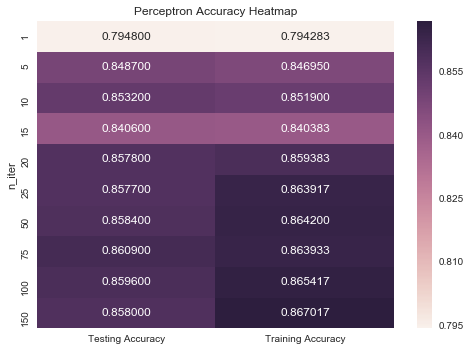

In [25]:
# display the result
plt.clf()

fig_p = sns.heatmap(df_tune_p, annot=True, fmt='f')
plt.subplots_adjust(top=0.9)
fig_p.set_title('Perceptron Accuracy Heatmap')

plt.show()

The best Perceptron model:

- training
    - n_iter = 150
    - accuracy = 0.87550
- testing 
    - n_iter = 75
    - accuracy = 0.88525

### Tuned Logistic Regression

In [26]:
# try different parameters and tune Logistic Regression

start = timeit.default_timer()

param_logit = [0.0001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
train_scores_logit = []
test_scores_logit = []

# Due to limited computing power, the parameters will be tested in sub-for-loops
for i in param_logit[:3]:
    clf_temp = LogisticRegression(penalty = 'l2', C = i, solver ='newton-cg')
    clf_temp.fit(train_image_sample, train_label_sample)
    temp_train_score = clf_temp.score(train_image, train_label)
    temp_test_score = clf_temp.score(test_image, test_label)
    train_scores_logit.append(temp_train_score)
    test_scores_logit.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_logit_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 85.969


In [27]:
# Due to limited computing power, the parameters will be tested in sub-for-loops
start = timeit.default_timer()

for i in param_logit[3:5]:
    clf_temp = LogisticRegression(penalty = 'l2', C = i, solver ='newton-cg')
    clf_temp.fit(train_image_sample, train_label_sample)
    temp_train_score = clf_temp.score(train_image, train_label)
    temp_test_score = clf_temp.score(test_image, test_label)
    train_scores_logit.append(temp_train_score)
    test_scores_logit.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_logit_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 87.205


In [28]:
# Due to limited computing power, the parameters will be tested in sub-for-loops
start = timeit.default_timer()

for i in param_logit[5:7]:
    clf_temp = LogisticRegression(penalty = 'l2', C = i, solver ='newton-cg')
    clf_temp.fit(train_image_sample, train_label_sample)
    temp_train_score = clf_temp.score(train_image, train_label)
    temp_test_score = clf_temp.score(test_image, test_label)
    train_scores_logit.append(temp_train_score)
    test_scores_logit.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_logit_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 157.823


In [29]:
# Due to limited computing power, the parameters will be tested in sub-for-loops
start = timeit.default_timer()

for i in param_logit[7:]:
    clf_temp = LogisticRegression(penalty = 'l2', C = i, solver ='newton-cg')
    clf_temp.fit(train_image_sample, train_label_sample)
    temp_train_score = clf_temp.score(train_image, train_label)
    temp_test_score = clf_temp.score(test_image, test_label)
    train_scores_logit.append(temp_train_score)
    test_scores_logit.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_logit_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 346.007


In [30]:
test_scores_logit

[0.85670000000000002,
 0.90759999999999996,
 0.90300000000000002,
 0.89359999999999995,
 0.88949999999999996,
 0.87809999999999999,
 0.87290000000000001,
 0.86539999999999995,
 0.86250000000000004]

In [31]:
# create a dataframe to display comparison
d_tune_logit = {'C': param_logit,
            'Training Accuracy': train_scores_logit,
            'Testing Accuracy': test_scores_logit}
df_tune_logit = pd.DataFrame(data = d_tune_logit)
df_tune_logit.set_index('C', inplace = True)

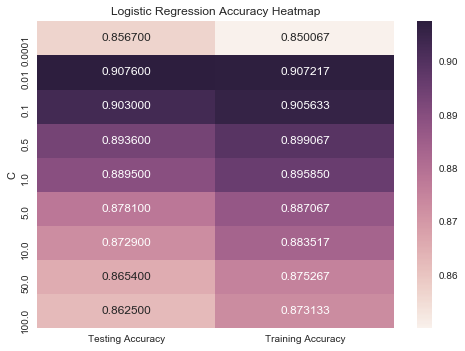

In [32]:
# display the result
plt.clf()

fig_logit = sns.heatmap(df_tune_logit, annot=True, fmt='f')
plt.subplots_adjust(top=0.9)
fig_logit.set_title('Logistic Regression Accuracy Heatmap')

plt.show()

The best Logistic Regression model:

- training
    - C = 0.01
    - accuracy = 0.907217
- testing 
    - C = 0.01
    - accuracy = 0.907600

### Tuned Linear SVM

In [34]:
# try different parameters and tune Linear SVM

start = timeit.default_timer()

param_lsvm = [0.0001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
train_scores_lsvm = []
test_scores_lsvm = []
# Due to limited computing power, the parameters will be tested in sub-for-loops
for i in param_lsvm[:3]:
    clf_temp = LinearSVC(penalty = 'l2', C = i, multi_class = 'ovr')
    clf_temp.fit(train_image_sample, train_label_sample)
    temp_train_score = clf_temp.score(train_image, train_label)
    temp_test_score = clf_temp.score(test_image, test_label)
    train_scores_lsvm.append(temp_train_score)
    test_scores_lsvm.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_lsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 84.938


In [35]:
# Due to limited computing power, the parameters will be tested in sub-for-loops
start = timeit.default_timer()
for i in param_lsvm[3:5]:
    clf_temp = LinearSVC(penalty = 'l2', C = i, multi_class = 'ovr')
    clf_temp.fit(train_image_sample, train_label_sample)
    temp_train_score = clf_temp.score(train_image, train_label)
    temp_test_score = clf_temp.score(test_image, test_label)
    train_scores_lsvm.append(temp_train_score)
    test_scores_lsvm.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_lsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 70.423


In [36]:
# Due to limited computing power, the parameters will be tested in sub-for-loops
start = timeit.default_timer()
for i in param_lsvm[5:7]:
    clf_temp = LinearSVC(penalty = 'l2', C = i, multi_class = 'ovr')
    clf_temp.fit(train_image_sample, train_label_sample)
    temp_train_score = clf_temp.score(train_image, train_label)
    temp_test_score = clf_temp.score(test_image, test_label)
    train_scores_lsvm.append(temp_train_score)
    test_scores_lsvm.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_lsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 77.800


In [37]:
# Due to limited computing power, the parameters will be tested in sub-for-loops
start = timeit.default_timer()
for i in param_lsvm[7:]:
    clf_temp = LinearSVC(penalty = 'l2', C = i, multi_class = 'ovr')
    clf_temp.fit(train_image_sample, train_label_sample)
    temp_train_score = clf_temp.score(train_image, train_label)
    temp_test_score = clf_temp.score(test_image, test_label)
    train_scores_lsvm.append(temp_train_score)
    test_scores_lsvm.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_lsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 76.632


In [38]:
# create a dataframe to display comparison
d_tune_lsvm = {'C': param_lsvm,
            'Training Accuracy': train_scores_lsvm,
            'Testing Accuracy': test_scores_lsvm}
df_tune_lsvm = pd.DataFrame(data = d_tune_lsvm)
df_tune_lsvm.set_index('C', inplace = True)

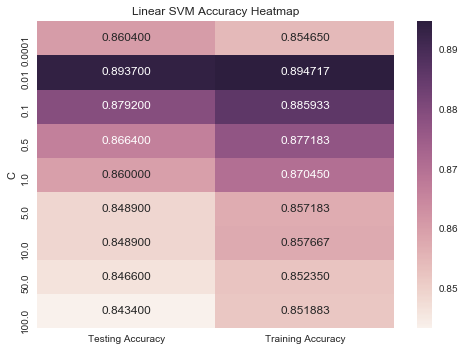

In [39]:
# display the result
plt.clf()

fig_lsvm = sns.heatmap(df_tune_lsvm, annot=True, fmt='f')
plt.subplots_adjust(top=0.9)
fig_lsvm.set_title('Linear SVM Accuracy Heatmap')

plt.show()

The best Linear SVM model:

- training
    - C = 0.01
    - accuracy = 0.894717
- testing 
    - C = 0.01
    - accuracy = 0.893700

### Tuned Radial SVM

In [51]:
# try different parameters and tune Linear SVM

start = timeit.default_timer()

param_rsvm = [0.0001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50]
train_scores_rsvm = []
test_scores_rsvm = []

In [40]:
# Due to limited computing power, the parameters will be tested in one by one

clf_temp = SVC(C = param_rsvm[0], kernel = 'rbf', degree = 3, gamma = 'auto')
clf_temp.fit(train_image_sample, train_label_sample)
temp_train_score = clf_temp.score(train_image, train_label)
temp_test_score = clf_temp.score(test_image, test_label)
train_scores_rsvm.append(temp_train_score)
test_scores_rsvm.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_rsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 775.596


In [41]:
# Due to limited computing power, the parameters will be tested in one by one
start = timeit.default_timer()
clf_temp = SVC(C = param_rsvm[1], kernel = 'rbf', degree = 3, gamma = 'auto')
clf_temp.fit(train_image_sample, train_label_sample)
temp_train_score = clf_temp.score(train_image, train_label)
temp_test_score = clf_temp.score(test_image, test_label)
train_scores_rsvm.append(temp_train_score)
test_scores_rsvm.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_rsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 782.354


In [42]:
# Due to limited computing power, the parameters will be tested in one by one
start = timeit.default_timer()
clf_temp = SVC(C = param_rsvm[2], kernel = 'rbf', degree = 3, gamma = 'auto')
clf_temp.fit(train_image_sample, train_label_sample)
temp_train_score = clf_temp.score(train_image, train_label)
temp_test_score = clf_temp.score(test_image, test_label)
train_scores_rsvm.append(temp_train_score)
test_scores_rsvm.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_rsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 562.400


In [43]:
# Due to limited computing power, the parameters will be tested in one by one
start = timeit.default_timer()
clf_temp = SVC(C = param_rsvm[3], kernel = 'rbf', degree = 3, gamma = 'auto')
clf_temp.fit(train_image_sample, train_label_sample)
temp_train_score = clf_temp.score(train_image, train_label)
temp_test_score = clf_temp.score(test_image, test_label)
train_scores_rsvm.append(temp_train_score)
test_scores_rsvm.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_rsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 391.347


In [44]:
# Due to limited computing power, the parameters will be tested in one by one
start = timeit.default_timer()
clf_temp = SVC(C = param_rsvm[4], kernel = 'rbf', degree = 3, gamma = 'auto')
clf_temp.fit(train_image_sample, train_label_sample)
temp_train_score = clf_temp.score(train_image, train_label)
temp_test_score = clf_temp.score(test_image, test_label)
train_scores_rsvm.append(temp_train_score)
test_scores_rsvm.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_rsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 359.545


In [45]:
# Due to limited computing power, the parameters will be tested in one by one
start = timeit.default_timer()
clf_temp = SVC(C = param_rsvm[5], kernel = 'rbf', degree = 3, gamma = 'auto')
clf_temp.fit(train_image_sample, train_label_sample)
temp_train_score = clf_temp.score(train_image, train_label)
temp_test_score = clf_temp.score(test_image, test_label)
train_scores_rsvm.append(temp_train_score)
test_scores_rsvm.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_rsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 364.674


In [46]:
# Due to limited computing power, the parameters will be tested in one by one
start = timeit.default_timer()
clf_temp = SVC(C = param_rsvm[6], kernel = 'rbf', degree = 3, gamma = 'auto')
clf_temp.fit(train_image_sample, train_label_sample)
temp_train_score = clf_temp.score(train_image, train_label)
temp_test_score = clf_temp.score(test_image, test_label)
train_scores_rsvm.append(temp_train_score)
test_scores_rsvm.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_rsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 322.565


In [52]:
# Due to limited computing power, the parameters will be tested in one by one
start = timeit.default_timer()
clf_temp = SVC(C = param_rsvm[7], kernel = 'rbf', degree = 3, gamma = 'auto')
clf_temp.fit(train_image_sample, train_label_sample)
temp_train_score = clf_temp.score(train_image, train_label)
temp_test_score = clf_temp.score(test_image, test_label)
train_scores_rsvm.append(temp_train_score)
test_scores_rsvm.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_rsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 353.673


In [53]:
# Due to limited computing power, the parameters will be tested in one by one
start = timeit.default_timer()
clf_temp = SVC(C = param_rsvm[8], kernel = 'rbf', degree = 3, gamma = 'auto')
clf_temp.fit(train_image_sample, train_label_sample)
temp_train_score = clf_temp.score(train_image, train_label)
temp_test_score = clf_temp.score(test_image, test_label)
train_scores_rsvm.append(temp_train_score)
test_scores_rsvm.append(temp_test_score)

stop = timeit.default_timer()
clf_tune_rsvm_time = stop - start
print('Running time: %.3f' % (stop - start))

Running time: 313.959


In [54]:
# create a dataframe to display comparison
d_tune_rsvm = {'C': param_rsvm,
            'Training Accuracy': train_scores_rsvm,
            'Testing Accuracy': test_scores_rsvm}
df_tune_rsvm = pd.DataFrame(data = d_tune_rsvm)
df_tune_rsvm.set_index('C', inplace = True)

ValueError: arrays must all be same length

In [ ]:
# display the result
plt.clf()

fig_rsvm = sns.heatmap(df_tune_rsvm, annot=True, fmt='f')
plt.subplots_adjust(top=0.9)
fig_rsvm.set_title('Radial SVM Accuracy Heatmap')

plt.show()

In [55]:
train_scores_rsvm

[0.95609999999999995, 0.95616666666666672]

The best Radial SVM model:

- training
    - C = 10.0
    - accuracy = 0.956367
- testing 
    - C = 50.0 or 100.0
    - accuracy = 0.950300

### Tuned models comparison

Overall:

- The best classifier for training data:
    - Model: Radial SVM
    - Parameters: C = 10.0, kernel = 'rbf', degree = 3, gamma = 'auto'
    - Accuracy: 0.956367

- The best classifier for testing data:
    - Model: Radial SVM
    - Parameters: C = 50.0 or 100.0, kernel = 'rbf', degree = 3, gamma = 'auto'
    - Accuracy: 0.950300